# **Notebook Idea**: Neural Network from Scratch

**Goal**: Build a simple feedforward neural network (1 hidden layer) to solve binary classification, e.g., predict if a point is above or below a line in 2D.

---

## **Step 1**: Introduction

* Explain what a neural network is:

    * Inspired by the brain.

    * Neurons take inputs, apply weights, bias, activation → output.

* Key components:

    * Input layer

    * Hidden layers

    * Output layer

* Activation function (ReLU, Sigmoid)

* Loss function (Binary Cross-Entropy)

* Optimizer (Gradient Descent)

 ---

## **Step 2**: Import Libraries & Generate Data

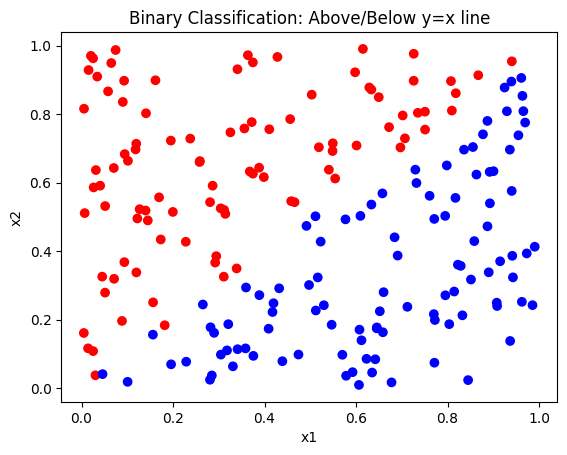

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset: points above/below y = x line
np.random.seed(42)
X = np.random.rand(200, 2)
y = (X[:, 1] > X[:, 0]).astype(int)

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Binary Classification: Above/Below y=x line")
plt.show()


### **Explanation**:

* We have 200 points in 2D.

* Class 1 if y > x, else 0.

* This is a perfect example to teach how NN learns boundaries.

---

## **Step 3**: Initialize Neural Network Parameters

In [2]:
input_size = 2      # x1, x2
hidden_size = 3     # 3 neurons in hidden layer
output_size = 1     # binary output

# Random weights and bias
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


### Explanation:

* W1 connects input → hidden

* b1 is hidden layer bias

* W2 connects hidden → output

* b2 is output bias

* Random initialization is important to break symmetry

---
## **Step 4**: Activation Functions

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)


### Explanation:

* ReLU: Hidden layer → speeds up learning

* Sigmoid: Output layer → gives probability for binary classification

---

## **Step 5**: Forward Pass

In [4]:
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

### Explanation:

* Z = weighted sum + bias

* A = activation output

--- 

## **Step 6**: Compute Loss

In [5]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = - (1/m) * np.sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    return loss

### Explanation:

* Binary Cross-Entropy loss for 0/1 classification

---

## **Step 7**: Backpropagation

In [6]:
def backward(X, y, Z1, A1, Z2, A2, learning_rate=0.1):
    global W1, W2, b1, b2   # declare first
    
    m = X.shape[0]

    # Output layer error
    dZ2 = A2 - y.reshape(-1,1)   # shape (m,1)
    dW2 = np.dot(A1.T, dZ2)/m
    db2 = np.sum(dZ2, axis=0, keepdims=True)/m

    # Hidden layer error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)/m
    db1 = np.sum(dZ1, axis=0, keepdims=True)/m

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


### Explanation:

* Compute error at output → propagate back to hidden layer

* Update weights using gradient descent

* ReLU derivative = 1 if positive, else 0

---

## **Step 8**: Train the Network

In [7]:
epochs = 1000
for i in range(epochs):
    Z1, A1, Z2, A2 = forward(X)
    loss = compute_loss(y, A2)
    backward(X, y, Z1, A1, Z2, A2, learning_rate=0.1)
    
    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss:.4f}")

Epoch 0, Loss: 202.1685
Epoch 100, Loss: 175.3620
Epoch 200, Loss: 234.3875
Epoch 300, Loss: 292.7975
Epoch 400, Loss: 344.1760
Epoch 500, Loss: 389.5435
Epoch 600, Loss: 430.4899
Epoch 700, Loss: 468.0435
Epoch 800, Loss: 502.5829
Epoch 900, Loss: 534.6262


## Explanation:

* Each iteration: forward pass → compute loss → backprop → update weights

* Loss should decrease over time

---

## **Step 9**: Visualize Decision Boundary

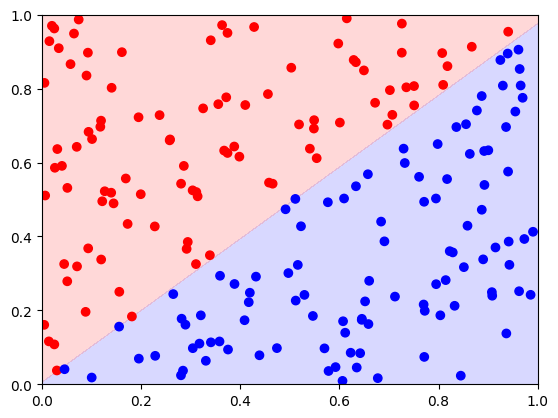

In [8]:
# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
grid = np.c_[xx.ravel(), yy.ravel()]
_, _, _, probs = forward(grid)
probs = probs.reshape(xx.shape)

plt.contourf(xx, yy, probs, levels=[0,0.5,1], alpha=0.3, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.show()


### Explanation:

* Shows how the network separates points

* Makes notebook visual and educational

## **Step 10**: Summary & Insights

* Neural network learned a non-linear boundary

* We implemented everything from scratch

* Concepts: forward pass, activation, backprop, gradient descent